In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from enum import Enum

In [2]:
df = pd.read_csv('sensor.csv')
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


# Tratamento dos dados

- Removendo coluna de index Unnamed pois não faz parte dos dados.

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [5]:
df['sensor_15'].unique()

array([nan])

- Com as informações acima, observamos que alguns sensores não possuem todos os registros
- O sensor 15 não possuí nenhum registro, sendo assim vamos remover está coluna do nosso dataframe

In [6]:
df.drop('sensor_15', axis=1, inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


In [8]:
df.isnull().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

- Vamos remover o sensor_50 pois 34.95% dos seus dados são null

In [9]:
df.drop('sensor_50', axis=1, inplace=True)

In [10]:
mean_by_sensor = [] 

for sensor in df.columns[1:-1]:
    mean_sensor = df.groupby(['machine_status'])[sensor].mean().to_dict()
    mean_by_sensor.append({**mean_sensor, 'sensor': sensor})
    
pd.DataFrame(data=mean_by_sensor)

,BROKEN,NORMAL,RECOVERING,sensor
0,1.194188,2.420476,0.055215,sensor_00
1,45.969742,48.180116,39.221386,sensor_01
2,50.837052,51.636949,39.922701,sensor_02
3,42.931546,44.167060,37.856698,sensor_03
4,334.672200,625.673284,93.034093,sensor_04
5,45.351953,75.389764,45.060385,sensor_05
6,9.818328,13.865073,5.784861,sensor_06
7,13.731811,16.165959,8.495140,sensor_07
8,13.294684,15.478129,9.117674,sensor_08
9,12.788318,15.086662,8.822057,sensor_09


- Como entre os sensores existe uma variação considerável da média em cada machine_status, vamos pegar a média de cada um para preencher os valores null
- [Artigo de referência para os métodos](https://towardsdatascience.com/6-tips-for-dealing-with-null-values-e16d1d1a1b33) 

In [11]:
for sensor in df.columns[1:-1]:
    df[sensor].fillna(df.groupby(['machine_status'])[sensor].transform('mean'), inplace=True)
    
df.isnull().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


# Mapa de calor
- Com mapa de calor acima conseguimos observar um grupo de grande correlação no nosso conjunto de dados, os sensores 14 á 26 possuem a maior correlação no conjunto 

<AxesSubplot:>

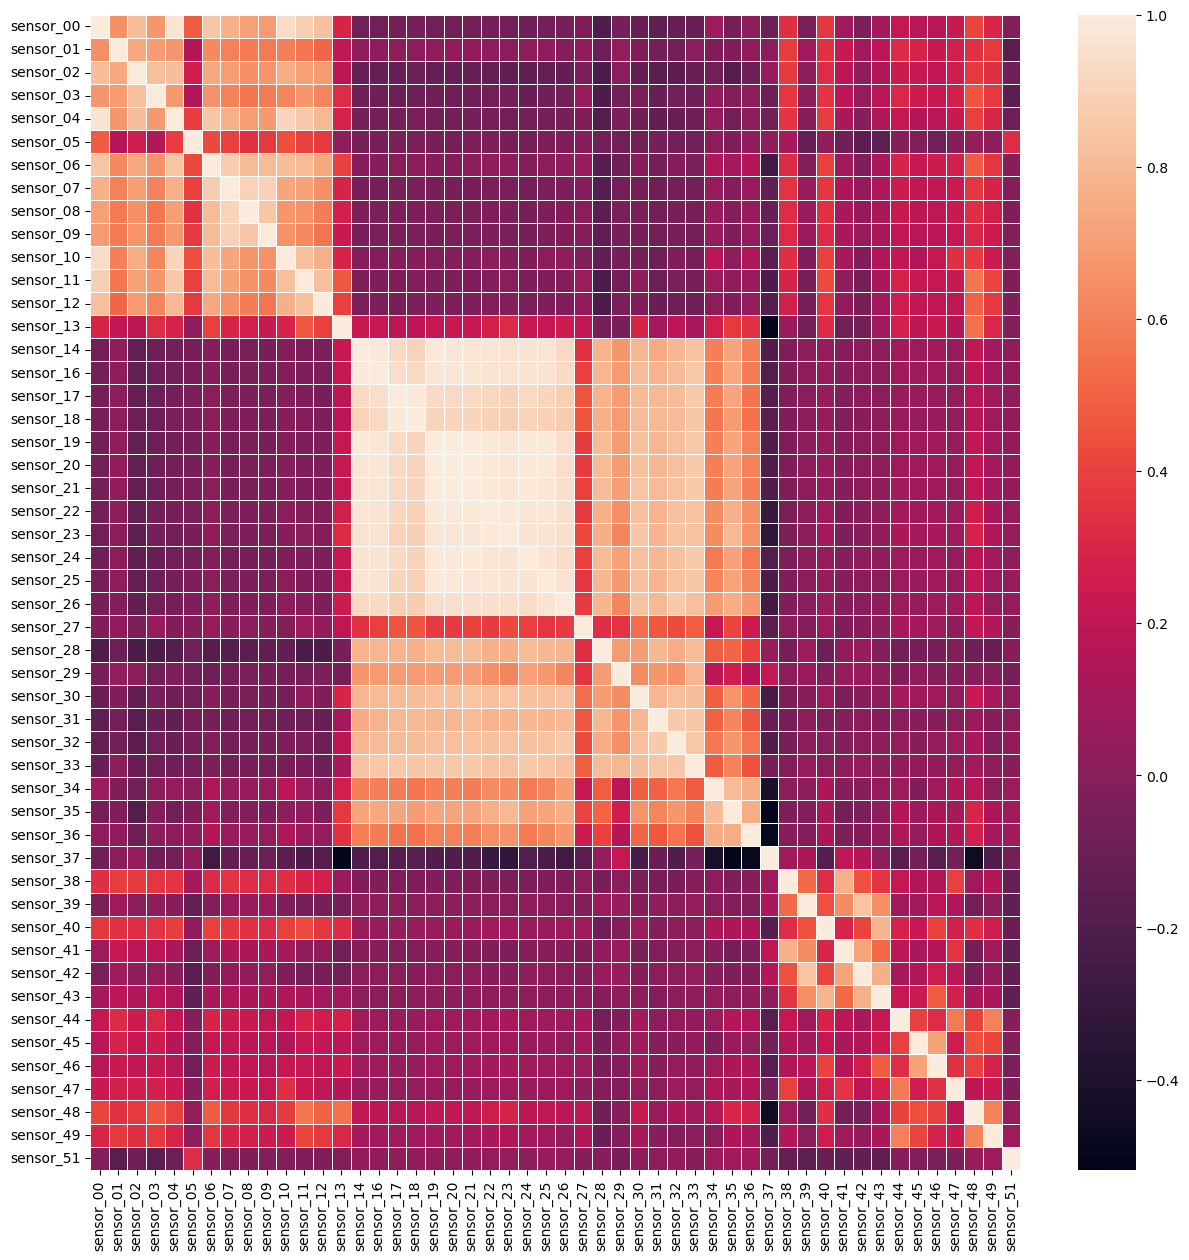

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=.5)

# Desconstruindo campo timestamp
- Por se tratar de dados referentes ao sensor de uma bomba, acredito que deva existir periodos de maior e menor uso da mesma, por isso a coluna timestamp vai ser divida para melhor visualizacao dos periodos 

In [51]:
class DayPeriod(Enum):
    DAWN = 0
    MORNING = 1
    EVENING = 2
    NIGTH = 3
    
def get_period_by_hour(hour):
    if hour >= 0 and hour < 6:
        return DayPeriod.DAWN.value
    if hour < 12:
        return DayPeriod.MORNING.value
    if hour < 18:
        return DayPeriod.EVENING.value
    return DayPeriod.NIGTH.value
    
def desconstruct_date(date):
    hour = date.hour
    day_period = get_period_by_hour(hour)
    
    return date.year, date.month, date.day, date.weekday(), date.hour, day_period 
    

In [52]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df['year'], df['month'], df['day'], df['week_day'], df['hour'], df['day_period'] = zip(*df['date'].apply(lambda x: desconstruct_date(x)))
df.head(10)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_49,sensor_51,machine_status,date,year,month,day,week_day,hour,day_period
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,67.70834,201.3889,NORMAL,2018-04-01 00:00:00,2018,4,1,6,0,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,67.70834,201.3889,NORMAL,2018-04-01 00:01:00,2018,4,1,6,0,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,67.12963,203.7037,NORMAL,2018-04-01 00:02:00,2018,4,1,6,0,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,66.84028,203.1250,NORMAL,2018-04-01 00:03:00,2018,4,1,6,0,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,66.55093,201.3889,NORMAL,2018-04-01 00:04:00,2018,4,1,6,0,0
5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,...,66.55093,201.6782,NORMAL,2018-04-01 00:05:00,2018,4,1,6,0,0
6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,...,67.70834,200.2315,NORMAL,2018-04-01 00:06:00,2018,4,1,6,0,0
7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,...,68.57639,201.0995,NORMAL,2018-04-01 00:07:00,2018,4,1,6,0,0
8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,...,69.44444,201.6782,NORMAL,2018-04-01 00:08:00,2018,4,1,6,0,0
9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,15.61777,...,69.73380,200.8102,NORMAL,2018-04-01 00:09:00,2018,4,1,6,0,0


In [65]:
df[['year', 'month', 'day', 'week_day', 'day_period']].value_counts()

year  month  day  week_day  day_period
2018  4      1    6         0             360
      7      12   3         3             360
             11   2         0             360
                            1             360
                            2             360
                                         ... 
      5      22   1         0             360
                            1             360
                            2             360
                            3             360
      8      31   4         3             360
Length: 612, dtype: int64

- Como existe apenas o ano de 2018 a coluna ir vai ser removida

In [66]:
df.drop('year', axis=1, inplace=True)

- Vamos transformar a coluna machine_status em inteiros para facilitar o tratamento e análise dos dados

In [79]:
df.groupby(['machine_status'])['machine_status'].count()

machine_status
BROKEN             7
NORMAL        205836
RECOVERING     14477
Name: machine_status, dtype: int64

In [73]:
class MachineStatus(Enum):
    NORMAL=1
    BROKEN=2
    RECOVERING=3


In [78]:
df['machine_status_value'] = df['machine_status'].apply(lambda x: MachineStatus[x].value)
df.groupby(['machine_status', 'machine_status_value'])['machine_status_value'].count()

machine_status  machine_status_value
BROKEN          2                            7
NORMAL          1                       205836
RECOVERING      3                        14477
Name: machine_status_value, dtype: int64

# Mapa de calor com periodos e status de máquina
- Conseguimos ver que dia e mês possuem uma leve relação com alguns sensores mas não possuem uma relação relevante com status da máquina

<AxesSubplot:>

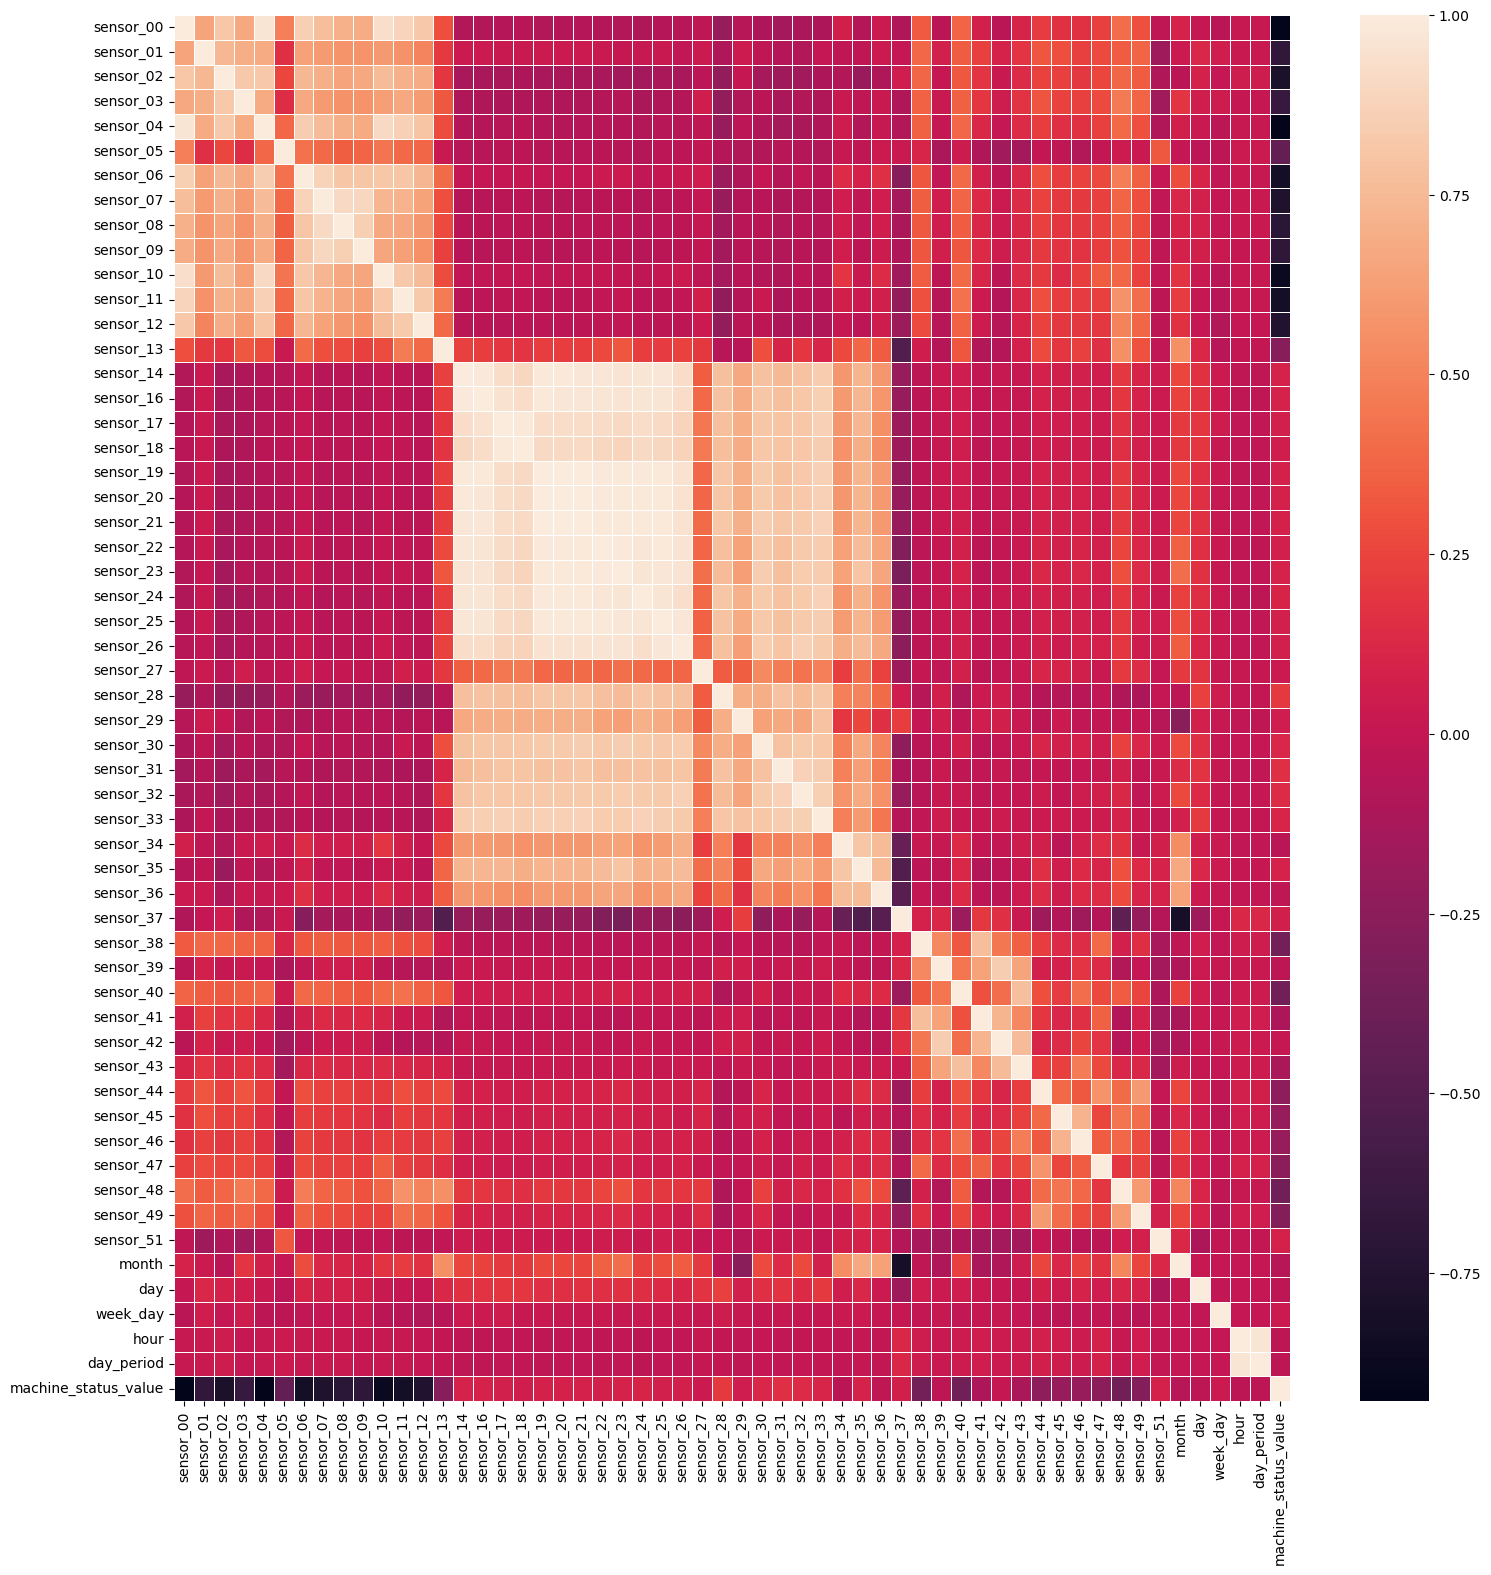

In [80]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), linewidths=.5)

'NORMAL'